In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

data_path = Path("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
visuals_dir = Path("../visuals")
visuals_dir.mkdir(parents=True, exist_ok=True)


df = pd.read_csv(data_path)

# Clean
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna(subset=["TotalCharges"])


df["ChurnFlag"] = df["Churn"].map({"Yes": 1, "No": 0})


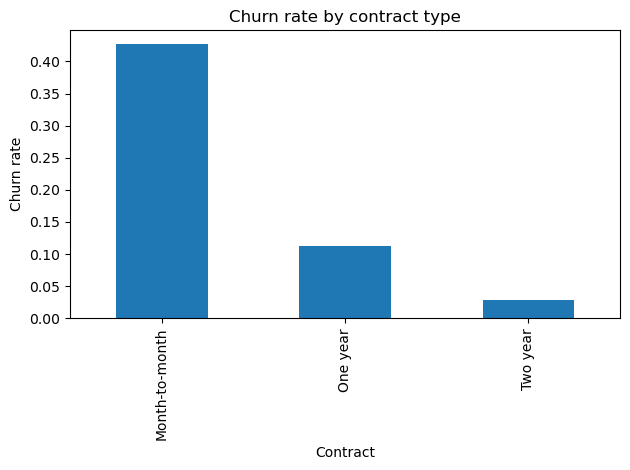

In [2]:
churn_by_contract = (
    df.groupby("Contract")["ChurnFlag"]
      .mean()
      .sort_values(ascending=False)
)

plt.figure()
churn_by_contract.plot(kind="bar")
plt.title("Churn rate by contract type")
plt.xlabel("Contract")
plt.ylabel("Churn rate")
plt.tight_layout()
plt.savefig(visuals_dir / "churn_by_contract.png", dpi=200)
plt.show()


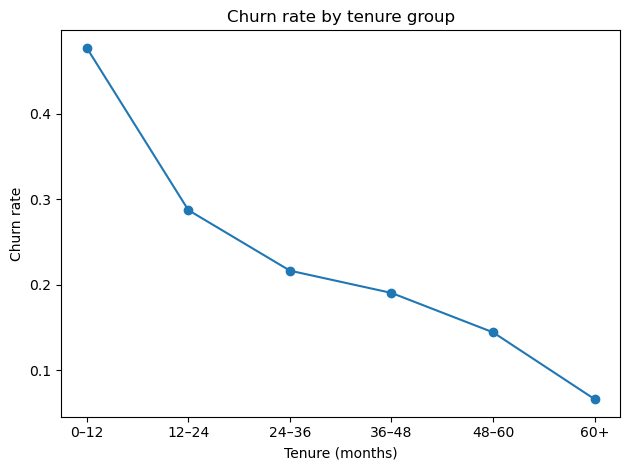

In [3]:
df["TenureGroup"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 24, 36, 48, 60, 72],
    labels=["0–12", "12–24", "24–36", "36–48", "48–60", "60+"]
)

churn_by_tenure = (
    df.groupby("TenureGroup", observed=False)["ChurnFlag"]
      .mean()
)

plt.figure()
plt.plot(churn_by_tenure.index.astype(str), churn_by_tenure.values, marker="o")
plt.title("Churn rate by tenure group")
plt.xlabel("Tenure (months)")
plt.ylabel("Churn rate")
plt.tight_layout()
plt.savefig(visuals_dir / "churn_by_tenure.png", dpi=200)
plt.show()


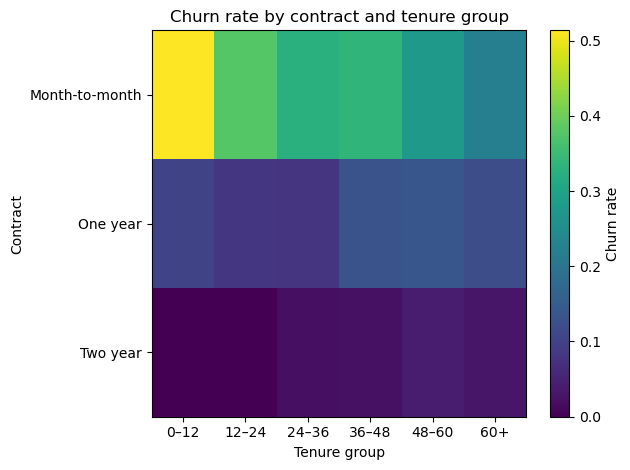

In [4]:
pivot = (
    df.groupby(["Contract", "TenureGroup"], observed=False)["ChurnFlag"]
      .mean()
      .unstack()
)

plt.figure()
plt.imshow(pivot.values, aspect="auto")
plt.title("Churn rate by contract and tenure group")
plt.xlabel("Tenure group")
plt.ylabel("Contract")
plt.xticks(range(pivot.shape[1]), pivot.columns.astype(str), rotation=0)
plt.yticks(range(pivot.shape[0]), pivot.index)
plt.colorbar(label="Churn rate")
plt.tight_layout()
plt.savefig(visuals_dir / "churn_heatmap_contract_tenure.png", dpi=200)
plt.show()
